# Praca domowa 6
## Konstanty Kraszewski
Praca ze zbiorem Olivetti Faces

In [1]:
from sklearn.datasets import fetch_olivetti_faces
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import warnings
warnings.filterwarnings('ignore')

In [2]:
data, targets = fetch_olivetti_faces(return_X_y=True)

In [3]:
def plot_gallery(images, n_col, n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(comp.reshape((64,64)), cmap=plt.cm.gray,
                   interpolation='nearest')
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

### Przykładowe zdjęcia

In [4]:
chosen_photos = list(range(0,5))

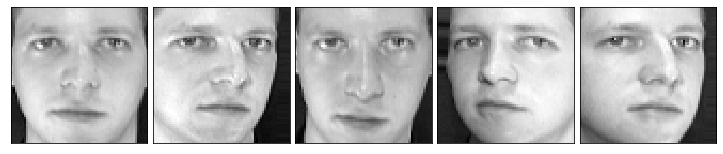

In [5]:
plot_gallery(data[chosen_photos],len(chosen_photos),1)

### Zastosowanie PCA

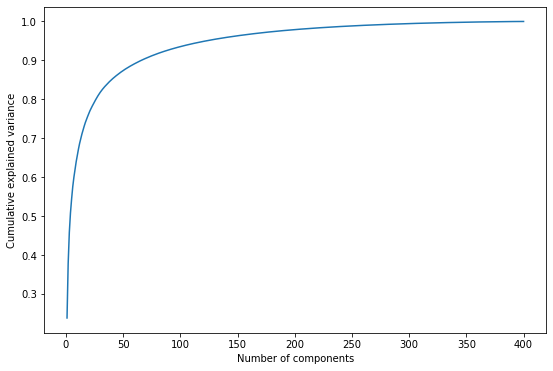

In [6]:
from sklearn.decomposition import PCA
pca = PCA().fit(data)

plt.figure(figsize=(9,6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [7]:
threshold = 0.95
l = np.cumsum(pca.explained_variance_ratio_)
print(f"Liczba składowych wyjaśniających {threshold*100} procent wariancji: {list(l-threshold).index(min(filter(lambda x: x>0, l-threshold)))}")

Liczba składowych wyjaśniających 95.0 procent wariancji: 122


#### Transformacja danych

In [8]:
pca = PCA(n_components=122)
data_pca = pca.fit_transform(data)

In [9]:
print(f"Stopień kompresji: {data.shape[1]/data_pca.shape[1]}")

Stopień kompresji: 33.57377049180328


#### Oryginalne zdjęcia w porównaniu ze zdjęciami po odwrotnej transformacji

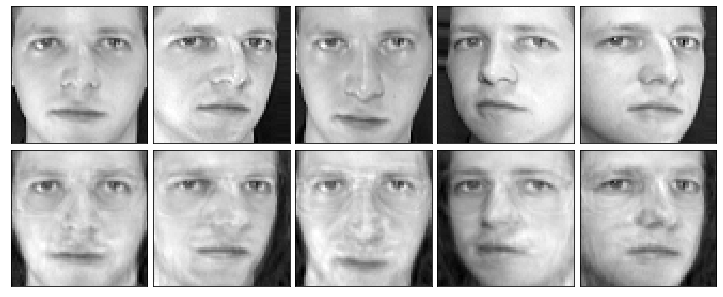

In [10]:
data_pca_inversed = pca.inverse_transform(data_pca)
plot_gallery(np.concatenate((data[chosen_photos],data_pca_inversed[chosen_photos])),len(chosen_photos),2)

### Błąd rekonstrukcji

Maksymalny błąd:  0.0392
    Średni błąd:  0.0310
 Minimalny błąd:  0.0221


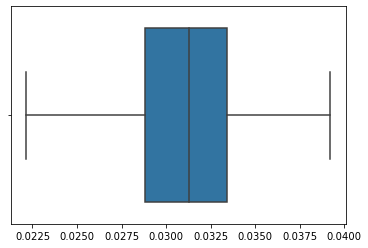

In [11]:
from sklearn.metrics import mean_squared_error
mses = 400 * [0]
for i in range(400):
    mses[i] = mean_squared_error(data[i],data_pca_inversed[i], squared=False)
    
print(f"Maksymalny błąd:  {max(mses):.4f}")
print(f"    Średni błąd:  {np.mean(mses):.4f}")
print(f" Minimalny błąd:  {min(mses):.4f}")

sns.boxplot(mses)
plt.show()

### Modyfikacje zdjęć

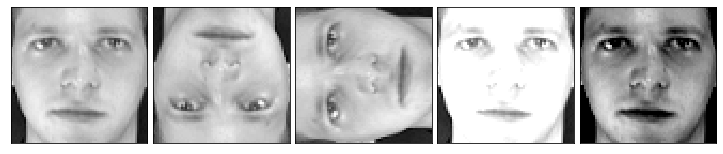

In [12]:
mods = [0] * 5
mods[0] = data[0]
mods[1] = list(data[0])[::-1]
mods[2] = np.reshape(np.rot90(np.reshape(data[0], (64, 64))), (4096))
mods[3] = list(map(lambda x: min(1,x+0.35), data[0]))
mods[4] = list(map(lambda x: max(0,x-0.45), data[0]))

mods = np.array(mods)

plot_gallery(mods, len(mods), 1)

In [13]:
mods_pca = pca.transform(mods)
mods_pca_inversed = pca.inverse_transform(mods_pca)

#### Zmodyfikowane zdjęcia po odwrotnej transformacji

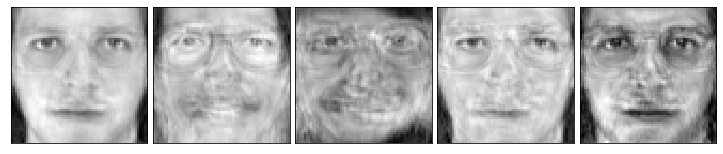

In [14]:
plot_gallery(mods_pca_inversed, len(mods), 1)

### Błędy rekonstrukcji dla zmodyfikowanych zdjęć

In [15]:
mse_mods = [0] * 5
for i in range(5):
    mse_mods[i] = mean_squared_error(mods[i],mods_pca_inversed[i], squared=False)

print(f'''    oryginalny: {mse_mods[0]:.4f}
1. modyfikacja: {mse_mods[1]:.4f}
2. modyfikacja: {mse_mods[2]:.4f}
3. modyfikacja: {mse_mods[3]:.4f}
4. modyfikacja: {mse_mods[4]:.4f}''')

    oryginalny: 0.0303
1. modyfikacja: 0.0782
2. modyfikacja: 0.0846
3. modyfikacja: 0.0421
4. modyfikacja: 0.0388


### Wniosek
Widać, że otrzymane wartości RMSE są większe dla zmodyfikowanych obrazów, szczególnie dla tych, które zostały obrócone. Można zatem dojść do wniosku, że jest to sposób na wykrywanie tego typu anomalii. Różnice w przypadku rozjaśnionego i przyciemnionego obrazu nie są już niestety tak znaczące.